In [1]:
# import Necessary Library

import numpy as np
import pandas as pd
##################################################
%matplotlib inline
import matplotlib.pyplot as plt
##################################################

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

RANDOM_SEED = 6

pd.set_option("display.max_columns",100)

# Set Multiple Display output in one block

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Set Data

features = pd.read_csv("./Data/training_set_features.csv",
                      index_col="respondent_id")

labels = pd.read_csv("./Data/training_set_labels.csv",
                    index_col = "respondent_id")
# Features and Labels are dataframe

In [172]:
# Imported Later
# TEST DATA
# SUBMISSION_FORMAT

test_features = pd.read_csv('./Data/test_set_features.csv',index_col='respondent_id')
test_features.head()
submission = pd.read_csv('./Data/submission_format.csv',index_col='respondent_id')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
# See Data Shape
print(features.shape)
features.head()
features.dtypes

print('-------------------------------------------')

print(labels.shape)
labels.head()
labels.dtypes

(26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

-------------------------------------------
(26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object

----------------------------------------------------------------------------------------------------------------------------------

In [5]:
# Test features and labels have equal index
# If not equal return error

np.testing.assert_equal(features.index.values,labels.index.values)

Text(0, 0.5, 'seasonal_vaccine')

Text(0, 0.5, 'h1n1_vaccine')

<AxesSubplot:title={'center':'Proportion of H1N1 Vaccine'}, ylabel='h1n1_vaccine'>

<AxesSubplot:title={'center':'Proportion of Seasonal Vaccine'}, ylabel='seasonal_vaccine'>

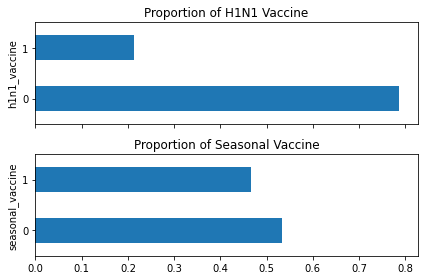

In [6]:
fig, ax = plt.subplots(2, 1, sharex=True)

ax[1].set_ylabel("seasonal_vaccine")
ax[0].set_ylabel("h1n1_vaccine")

n_obs = labels.shape[0]
# print (n_obs)
(labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)


(labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)


fig.tight_layout()

In [7]:
# See the relation between to labels as we have multilabel here
pd.crosstab(
    labels["h1n1_vaccine"],
    labels["seasonal_vaccine"], 
    margins=True,
    normalize = True
    
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [8]:
labels.h1n1_vaccine.corr(labels.seasonal_vaccine)

0.3771426530614447

In [9]:
# Join Both (feature and lable) Data frame together

joined = features.join(labels)
joined.shape
joined.head()


(26707, 37)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [10]:
groupbyed = joined[['h1n1_concern','h1n1_vaccine']].groupby(['h1n1_concern','h1n1_vaccine']).size().unstack(['h1n1_vaccine'])

In [11]:
print(groupbyed)

h1n1_vaccine     0     1
h1n1_concern            
0.0           2849   447
1.0           6756  1397
2.0           8102  2473
3.0           3250  1341


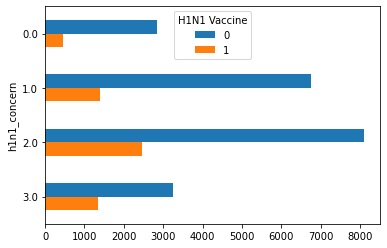

In [12]:
ax =groupbyed.plot.barh()
ax.invert_yaxis()
ax.legend(loc='upper center',title='H1N1 Vaccine')

In [13]:
groupbyed_sum = groupbyed.sum('columns')
groupbyed_sum

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [14]:
groupbyed_sum_divided = groupbyed.div(groupbyed_sum,'rows')
groupbyed_sum_divided

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


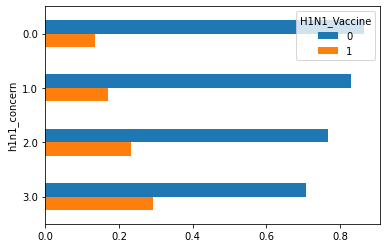

In [15]:
ax = groupbyed_sum_divided.plot.barh()
ax.invert_yaxis()
ax.legend(loc='best',title='H1N1_Vaccine')

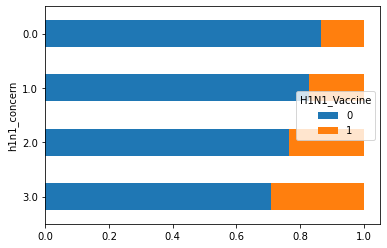

In [16]:
ax = groupbyed_sum_divided.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center right',title='H1N1_Vaccine')

In [17]:
def plotting (join, group, ax=None):
    
    col=group[0]
    target=group[1]
    # print(a,b,unstack)
    
    g_j=join[[col,target]].groupby([col,target]).size().unstack(target)
    g_j_sum = g_j.sum('columns')
    g_j_s_div = g_j.div(g_j_sum,'rows')
   
    '''
    print(g_j)
    print(g_j_sum)
    print(g_j_s_div)
    '''
    g_j_s_div.plot.barh(stacked=True,ax=ax)
    ax.invert_yaxis()
    ax.legend(loc='best',title=target)
    

In [18]:
# plotting(joined,['h1n1_concern','h1n1_vaccine'])

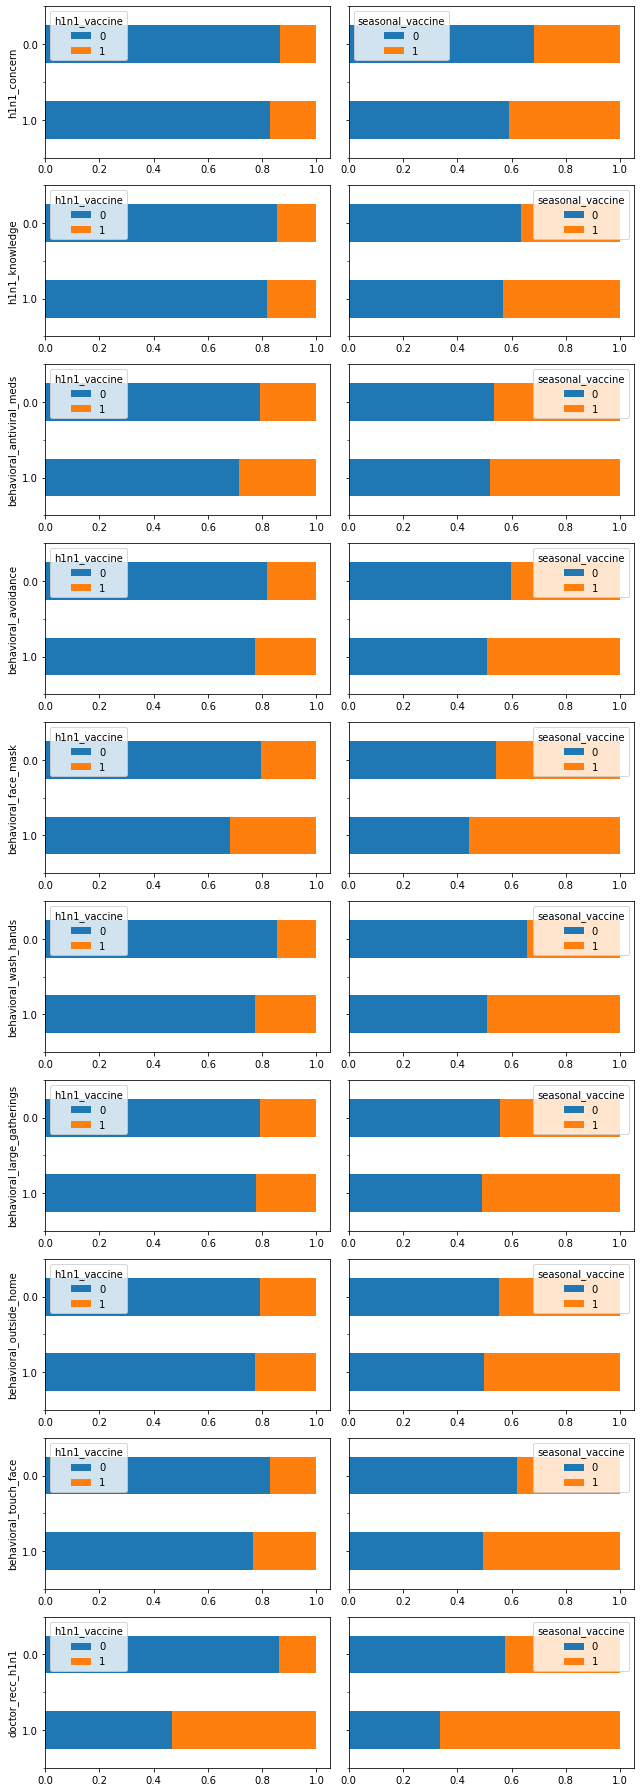

In [19]:

fig, ax = plt.subplots(10,2,figsize=(9,10*2.5),sharey=True)

for i, col in enumerate(joined):
    if i < 10:
        plotting(joined,[col,'h1n1_vaccine'],ax=ax[i,0])
        plotting(joined,[col,'seasonal_vaccine'],ax[i,1])
        
fig.tight_layout()

# --------------------------------------------------------------------------

### Lets Build Some Model and Do Some Machine Learning

In [22]:
# First as we want to use Logestic Regression should transform all features to numerical
# Logestic Regression dose not work with * CATEGORICAL DATA *

#Make two list for split numerical and object features
features_nonnum = []
features_num = []

# Do this in a loop
for i in features:
    if features[i].dtypes=="object":
        features_nonnum.append(features[i])
    else:
        features_num.append(features[i])

# Transform list to Pandas Data Frame
features_nonnum=pd.DataFrame(features_nonnum)
features_num=pd.DataFrame(features_num)

# Transpose y and x axis
features_nonnum=features_nonnum.transpose()
features_num=features_num.transpose()


###################################################
#features_num
#nonnum = features.columns[features.dtypes=="object"]
#features_nonnum = features.drop(columns=nonnum)
#features_num = features.drop(columns=nonnum)
###################################################


features_nonnum.head()
features_num.head()

# Now we build a ordinal encoder to change categorical data to numerical

encoder = OrdinalEncoder()
features_nonnum=pd.DataFrame(encoder.fit_transform(features_nonnum),columns=features_nonnum.columns)
features_nonnum.shape
features_num.shape

# Now lets join those data together

features=features_num.join(features_nonnum)
features.head()
features.tail()



,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


(26707, 12)

(26707, 23)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,8.0,2.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,12.0,19.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,14.0,21.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,4.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,5.0,1.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,18.0,5.0


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,4.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,9.0,2.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0,4.0,2.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,3.0,3.0,3.0,0.0,NaN,1.0,0.0,NaN,6.0,0.0,NaN,NaN
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,2.0,4.0,6.0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,7.0,1.0,NaN,NaN


In [23]:
# Handle Missing Data and Normalization

# We build pipeline and put transformers in it
# then we send pipeline to a column transformer
# darvaghe ma avval ye pipeline dorost kardim va har chandta transform ke mikhastim dakhelesh nahadim
# bad ye column transformer sakhtim va pipeline ro ke marahel transform dakhelesh 
# gharar dadimn ro be column transformer sepordim

preprocess_pipeline = Pipeline([('scaler',StandardScaler()),('imputer',SimpleImputer(strategy='median'))])


transformers = [('transform',preprocess_pipeline,features.columns)]

preprocessor = ColumnTransformer(transformers, remainder='drop',verbose=True)



In [24]:
# Now Select a Model

estimator = MultiOutputClassifier(estimator=LogisticRegression(penalty='l2', C=1 ,verbose=1))

In [25]:
# Join all together

full_pipeline = Pipeline([('preprocessor',preprocessor),('estimator',estimator)])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_out...
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'empl

In [105]:
# Lets prepare data for training

x_train, x_eval, y_train, y_eval = train_test_split(features,labels,test_size=0.2,shuffle=True,stratify=labels,random_state=RANDOM_SEED)

# NOW WE TRAIN OUR MODEL

full_pipeline.fit(x_train, y_train)

# NOW EVALUATE MODEL
# As This competition wants probabilities, not labels we predict probability

predict = full_pipeline.predict_proba(x_eval)

predict


[ColumnTransformer] ..... (1 of 1) Processing transform, total=   0.1s
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48091D+04    |proj g|=  6.14350D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36     15     17      1     0     0   5.260D-02   8.237D+03
  F =   8237.0642480793431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_out...
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'empl

[array([[0.90437806, 0.09562194],
        [0.93519107, 0.06480893],
        [0.90708203, 0.09291797],
        ...,
        [0.60012053, 0.39987947],
        [0.56835772, 0.43164228],
        [0.96388483, 0.03611517]]),
 array([[0.56551902, 0.43448098],
        [0.8731687 , 0.1268313 ],
        [0.52649393, 0.47350607],
        ...,
        [0.42641712, 0.57358288],
        [0.12523753, 0.87476247],
        [0.90201729, 0.09798271]])]

In [65]:
print(predict[0].shape)
print(predict[0])

(8814, 2)
[[0.69075719 0.30924281]
 [0.8926604  0.1073396 ]
 [0.77682852 0.22317148]
 ...
 [0.92475878 0.07524122]
 [0.92259569 0.07740431]
 [0.93622319 0.06377681]]


In [107]:
# change predict from list to dataframe

predict=pd.DataFrame({'h1n1_vaccine':predict[0][:,1],'seasonal_vaccine':predict[1][:,1]},index=y_eval.index)

predict.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
8579,0.095622,0.434481
22908,0.064809,0.126831
20210,0.092918,0.473506
25013,0.055935,0.272907
20669,0.071424,0.765058


In [109]:
# Now we plot ROC Curve
# As sklearn ROC has not multilabel classifie
# So we draw plots by our self separately
def plot_roc (y_label, y_predict, label, ax):
    fpr, tpr, threshold = roc_curve(y_label,y_predict)
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1],color='grey',linestyle='dotted')
    ax.set_ylabel('FPR')
    ax.set_xlabel('TPR')
    ax.set_title(f"{label} AUC: {roc_auc_score(y_label,y_predict):.4f}")
    
    

In [83]:
y_eval.loc[:,'h1n1_vaccine']

respondent_id
6728     1
16516    0
3106     0
16981    1
19111    0
        ..
6876     0
5834     1
13478    0
18399    0
13227    0
Name: h1n1_vaccine, Length: 8814, dtype: int64

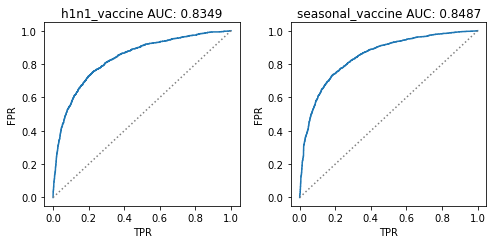

In [111]:
# And The Plots
fig, ax = plt.subplots(1,2,figsize=(7,3.5))

plot_roc(y_eval['h1n1_vaccine'],predict['h1n1_vaccine'],'h1n1_vaccine',ax[0])
plot_roc(y_eval['seasonal_vaccine'],predict['seasonal_vaccine'],'seasonal_vaccine',ax[1])

plt.tight_layout()

In [113]:
roc_auc_score(y_eval,predict)

0.841804426481114

In [176]:
# now as we want test our data by testdata
# we train our model with whole data

full_pipeline.fit(features,labels)

[ColumnTransformer] ..... (1 of 1) Processing transform, total=   0.1s
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85119D+04    |proj g|=  7.67950D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   36     16     17      1     0     0   8.200D-02   1.027D+04
  F =   10271.854974433172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_out...
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'empl

In [174]:
# First as new data (test) has categorical data
#Make two list for split numerical and object features
test_features_nonnum = []
test_features_num = []

# Do this in a loop
for i in test_features:
    if test_features[i].dtypes=="object":
        test_features_nonnum.append(test_features[i])
    else:
        test_features_num.append(test_features[i])

# Transform list to Pandas Data Frame
test_features_nonnum=pd.DataFrame(test_features_nonnum)
test_features_num=pd.DataFrame(test_features_num)

# Transpose y and x axis
test_features_nonnum=test_features_nonnum.transpose()
test_features_num=test_features_num.transpose()


###################################################
#features_num
#nonnum = features.columns[features.dtypes=="object"]
#features_nonnum = features.drop(columns=nonnum)
#features_num = features.drop(columns=nonnum)
###################################################


test_features_nonnum.head()
test_features_num.head()

# Now we build a ordinal encoder to change categorical data to numerical

encoder = OrdinalEncoder()
test_features_nonnum=pd.DataFrame(encoder.fit_transform(test_features_nonnum),columns=test_features_nonnum.columns)
test_features_nonnum.shape
test_features_num.shape

# Now lets join those data together

test_features=test_features_num.join(test_features_nonnum)
test_features.head()
test_features.tail()



,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
26707,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",atmlpfrs,hfxkjkmi
26708,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,atmlpfrs,xqwwgdyp
26709,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,nduyfdeo,pvmttkik
26710,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",NaN,NaN
26711,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,fcxhlnwr,mxkfnird


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0


(26708, 12)

(26708, 23)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,2.0,2.0,3.0,0.0,NaN,1.0,1.0,0.0,5.0,1.0,NaN,21.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,2.0,5.0,4.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# now we ask our model to predict probability of labels

test_predict = full_pipeline.predict_proba(test_features)

In [151]:
type(test_predict)

list

In [147]:
# Now make things ready to submit to DrivenData platform

submission.head()
test_predict[0][:,1]

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


array([0.02007771, 0.19315384, 0.05155697, ..., 0.24340553, 0.01877564,
       0.13649557])

In [188]:
# Check to see are both dataframe same or not

np.testing.assert_array_equal(test_features.index.values,submission.index.values)

# fill the submission file with prediction data
submission['h1n1_vaccine'] = test_predict[0][:,1]
submission['seasonal_vaccine'] = test_predict[1][:,1]

submission.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.079577,0.281088
26708,0.061564,0.117057
26709,0.375884,0.650510
26710,0.450203,0.796139
26711,0.308344,0.689386


In [186]:
# export dataframe as .CSV file

submission.to_csv('./Data/my_submission_format.csv',index=True)